In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score, recall_score, f1_score, precision_recall_curve, roc_curve

In [2]:
df = pd.read_csv('motor_colision.csv')

In [3]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,...,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3
0,03/29/2018,17:40,QUEENS,11435.0,JAMAICA AVENUE,144 STREET,1.0,0.0,1,0,...,0,0,0,Failure to Yield Right-of-Way,No Car Involved,No Car Involved,3872020,Station Wagon/Sport Utility Vehicle,No Car Type,No Car Type
1,03/14/2016,14:45,MANHATTAN,10003.0,3 AVENUE,EAST 13 STREET,1.0,0.0,1,0,...,0,0,0,Unspecified,No Car Involved,No Car Involved,3406298,Bus,No Car Type,No Car Type
2,09/06/2016,22:08,QUEENS,11377.0,ROOSEVELT AVENUE,70 STREET,0.0,0.0,0,0,...,0,0,0,Backing Unsafely,Unspecified,No Car Involved,3514963,Sedan,Sedan,No Car Type
3,05/23/2018,16:16,QUEENS,11417.0,104 STREET,LIBERTY AVENUE,0.0,0.0,0,0,...,0,0,0,Unspecified,Unspecified,No Car Involved,3906228,Sedan,Pick-up Truck,No Car Type
4,02/13/2017,4:00,BRONX,10455.0,3 AVENUE,EAST 149 STREET,0.0,0.0,0,0,...,0,0,0,Turning Improperly,No Car Involved,No Car Involved,3615111,Sedan,No Car Type,No Car Type


In [4]:
df.dtypes

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                         float64
ON STREET NAME                    object
CROSS STREET NAME                 object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
COLLISION_ID                       int64
VEHICLE TYPE CODE 1               object
VEHICLE TYPE CODE 2               object
VEHICLE TYPE CODE 3               object
dtype: object

In [5]:
df_filtered = df.drop(columns=['CRASH DATE','CRASH TIME','ON STREET NAME','CROSS STREET NAME','NUMBER OF PERSONS KILLED','NUMBER OF PEDESTRIANS KILLED','NUMBER OF CYCLIST KILLED','NUMBER OF CYCLIST KILLED','NUMBER OF MOTORIST KILLED','CONTRIBUTING FACTOR VEHICLE 2','CONTRIBUTING FACTOR VEHICLE 3','COLLISION_ID','VEHICLE TYPE CODE 2','VEHICLE TYPE CODE 3'])

In [6]:
df_filtered

,BOROUGH,ZIP CODE,NUMBER OF PERSONS INJURED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF CYCLIST INJURED,NUMBER OF MOTORIST INJURED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1
0,QUEENS,11435.0,1.0,1,0,0,Failure to Yield Right-of-Way,Station Wagon/Sport Utility Vehicle
1,MANHATTAN,10003.0,1.0,1,0,0,Unspecified,Bus
2,QUEENS,11377.0,0.0,0,0,0,Backing Unsafely,Sedan
3,QUEENS,11417.0,0.0,0,0,0,Unspecified,Sedan
4,BRONX,10455.0,0.0,0,0,0,Turning Improperly,Sedan
...,...,...,...,...,...,...,...,...
11099,BROOKLYN,11226.0,0.0,0,0,0,Other Electronic Device,PASSENGER VEHICLE
11100,QUEENS,11378.0,0.0,0,0,0,Passing Too Closely,trail
11101,BROOKLYN,11236.0,0.0,0,0,0,Driver Inattention/Distraction,PASSENGER VEHICLE
11102,BRONX,10471.0,1.0,1,0,0,Passenger Distraction,SPORT UTILITY / STATION WAGON


In [7]:
df_filtered = df_filtered[~(df_filtered['NUMBER OF PERSONS INJURED']==11)]

In [8]:
vc = df_filtered['ZIP CODE'].value_counts()
rm_vals = vc[vc < 60].index
df_filtered = df_filtered[~df_filtered['ZIP CODE'].isin(rm_vals)]

column_names = ['CONTRIBUTING FACTOR VEHICLE 1', 'VEHICLE TYPE CODE 1']
for i in column_names:
    vc = df_filtered[i].value_counts()
    rm_vals = vc[vc < 200].index
    df_filtered = df_filtered[~df_filtered[i].isin(rm_vals)]

In [9]:
df_filtered

,BOROUGH,ZIP CODE,NUMBER OF PERSONS INJURED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF CYCLIST INJURED,NUMBER OF MOTORIST INJURED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1
0,QUEENS,11435.0,1.0,1,0,0,Failure to Yield Right-of-Way,Station Wagon/Sport Utility Vehicle
2,QUEENS,11377.0,0.0,0,0,0,Backing Unsafely,Sedan
4,BRONX,10455.0,0.0,0,0,0,Turning Improperly,Sedan
6,BROOKLYN,11207.0,1.0,0,1,0,Driver Inattention/Distraction,Sedan
9,BROOKLYN,11236.0,0.0,0,0,0,Unspecified,SPORT UTILITY / STATION WAGON
...,...,...,...,...,...,...,...,...
11091,QUEENS,11420.0,2.0,0,0,2,Unspecified,Sedan
11092,BROOKLYN,11221.0,0.0,0,0,0,Unspecified,SPORT UTILITY / STATION WAGON
11097,BROOKLYN,11212.0,0.0,0,0,0,Unspecified,Sedan
11098,BROOKLYN,11229.0,1.0,0,0,1,Following Too Closely,Station Wagon/Sport Utility Vehicle


In [10]:
df_filtered['Injured'] = 0

df_filtered.loc[df_filtered['NUMBER OF PERSONS INJURED'] > 0, 'Injured'] = 1

df_filtered.drop(columns=['NUMBER OF PERSONS INJURED','NUMBER OF PEDESTRIANS INJURED','NUMBER OF CYCLIST INJURED','NUMBER OF MOTORIST INJURED'],inplace=True)

In [11]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for i in df_filtered.columns:
    df_filtered[i] = label.fit_transform(df_filtered[i])

df_filtered.head()


,BOROUGH,ZIP CODE,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1,Injured
0,3,86,2,3,1
2,3,76,0,2,0
4,0,27,7,2,0
6,1,43,1,2,1
9,1,67,8,1,0


In [12]:
y = df_filtered[['Injured']]
x = df_filtered.drop(columns = ['Injured'])

In [13]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=56)

X_resampled, y_resampled = undersampler.fit_resample(x, y)

In [14]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

C:\Users\shahj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
sx = MinMaxScaler()

In [17]:
nnx = sx.fit_transform(X_resampled)

In [18]:
nny = y_resampled

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(nnx, nny, test_size = 0.2, random_state = 22)

In [20]:
model =keras.Sequential({
    keras.layers.Dense(3,input_shape=(4,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
})
model.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error',
    metrics =['accuracy']
)
model.fit(X_train,y_train, epochs = 100)

Epoch 1/100


C:\Users\shahj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 642us/step - accuracy: 0.5064 - loss: 0.3773 
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - accuracy: 0.4929 - loss: 0.3624
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.4973 - loss: 0.3487
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.5017 - loss: 0.3391
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - accuracy: 0.4598 - loss: 0.3485
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.4566 - loss: 0.3383
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.4823 - loss: 0.3265
Epoch 8/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.4451 - loss: 0.3299
Epoch 9/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 0.4522 - loss: 0.3355
Epoch 10/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - accuracy: 0.4486 - loss: 0.3320
Epoch 11/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - accuracy: 0.4677 - loss: 0.3262
Epoch 12/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/ste

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.4158 - loss: 0.3262
Epoch 69/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.4224 - loss: 0.3326
Epoch 70/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.4223 - loss: 0.3297
Epoch 71/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.4245 - loss: 0.3278
Epoch 72/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.4275 - loss: 0.3294
Epoch 73/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 0.4220 - loss: 0.3245
Epoch 74/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.4133 - loss: 0.3320
Epoch 75/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.4393 - loss: 0.3289
Epoch 76/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.4339 - loss: 0.3289
Epoch 77/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.4229 - loss: 0.3304
Epoch 78/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.4389 - loss: 0.3320
Epoch 79/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 44

In [21]:
model.evaluate(X_test,y_test)
y_predict  = model.predict(X_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4345 - loss: 0.3244 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [22]:
y_plabels = [np.argmax(i) for i in y_predict]

Text(50.722222222222214, 0.5, 'True Value')

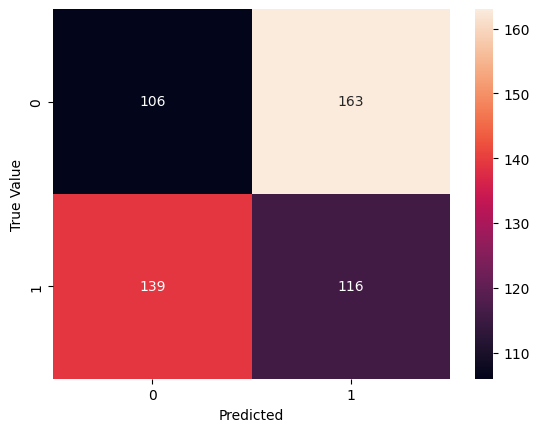

In [23]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_plabels)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('True Value')